## 图像边缘检测

边缘检测是图像处理和计算机视觉的基本问题，边缘检测的目的是标识数字图像中亮度变化明显的点，图像属性中的显著变化通常反映了属性的重要事件和变化。这些包括：深度上的不连续，表面方向的不连续，物质属性变化和场景照明变化。边缘检测是图像处理和计算机视觉中，尤其是特征提取中的一个研究领域。图像边缘检测大幅度的减少了数据量，并且剔除了可以认为不相关的信息，保留了图像重要的结构属性。

在实际的图像分割中，往往只用到一阶和二阶导数，虽然原理上，可以用更高阶的导数，但是因为噪声的影响，在纯粹二阶的导数操作中就会出现对噪声的敏感现象，三阶以上的导数信息往往失去了应用价值。二阶导数还可以说明灰度突变的类型。在某些情况下，如灰度变化均匀的图像，只利用一阶导数可能找不到边界，此时二阶导数就能提供很有用的信息。二阶导数对噪声也比较敏感，解决的方法是先对图像进行平滑滤波，消除部分噪声，再进行边缘检测。不过，利用二阶导数信息的算法是基于过零检测的，因此得到的边缘点数比较少，有利于后继的处理和识别工作。

人类视觉系统认识目标的过程分为两步:首先，把图像边缘与背景分离出来;然后，才能知觉到图像的细节，辨认出图像的轮廓。计算机视觉正是模仿人类视觉的这个过程。因此在检测物体边缘时，先对其轮廓点进行粗略检测，然后通过链接规则把原来检测到的轮廓点连接起来，同时也检测和连接遗漏的边界点及去除虚假的边界点。图像的边缘是图像的重要特征，是计算机视觉、模式识别等的基础，因此边缘检测是图象处理中一个重要的环节。然而，边缘检测又是图象处理中的一个难题，由于实际景物图像的边缘往往是各种类型的边缘及它们模糊化后结果的组合，且实际图像信号存在着噪声。噪声和边缘都属于高频信号，很难用频带做取舍。
　　这就需要边缘检测来进行解决的问题了。边缘检测的基本方法有很多，一阶的有Roberts Cross算子，Prewitt算子，Sobel算子，Krisch算子，罗盘算子；而二阶的还有Marr-Hildreth算子（又称为LOG算子），在梯度方向的二阶导数过零点，而Canny算子属于非微分边缘检测算子。各种算子的存在就是对这种导数分割原理进行的实例化计算，是为了在计算过程中直接使用的一种计算单位。在对图像的操作，我们采用模板对原图像进行卷积运算，从而达到我们想要的效果。而获取一幅图像的梯度就转化为：模板（Roberts、Prewitt、Sobel、Lapacian算子）对原图像进行卷积。

|算子|优缺点|备注|
|--|--|--|
|Roberts|对具有陡峭的低噪声图像处理效果较好，但利用Roberts算子提取边缘的结果是边缘比较粗，因此边缘定位不是很准确|一阶微分算子|
|Sobel|对灰度渐变和噪声较多的图像处理效果比较好，Sobel算子对边缘定位比较准确|一阶微分算子|
|Kirsch|对灰度渐变和噪声较多的图像处理效果较好|一阶微分算子|
|Prewitt|对灰度渐变和噪声较多的图像处理效果较好|一阶微分算子|
|Laplacian|对图像中的阶跃性边缘点定位准确|二阶微分算子|
|LoG|LoG算子出现双边缘像素边界，而且该检测方法对噪声比较敏感，所以很少用LOG算则进行边缘检测，而是用于边缘像素是否位于明区还是暗区|二阶微分算子|
|Canny|此方法不容易受噪声干扰，能够检测真正的弱边缘。|非微分边缘检测算子|

In [1]:
# 导入相关的包
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '../image/ImageSimilarity/lena.jpg'


## 一阶微分算子

### Roberts算子

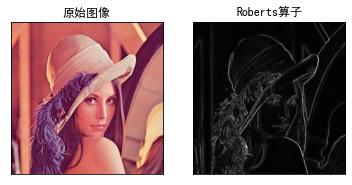

In [2]:
# 调包实现
img = cv2.imread(image_path)
lenna_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  
#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
#Roberts算子
kernelx = np.array([[-1,0],[0,1]], dtype=int)
kernely = np.array([[0,-1],[1,0]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
#转uint8
absX = cv2.convertScaleAbs(x)    
absY = cv2.convertScaleAbs(y)  
Roberts = cv2.addWeighted(absX,0.5,absY,0.5,0)
  
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
  
#显示图形
titles = [u'原始图像', u'Roberts算子']
images = [lenna_img, Roberts]
for i in range(2):
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')
   plt.title(titles[i])
   plt.xticks([]),plt.yticks([])
plt.show()

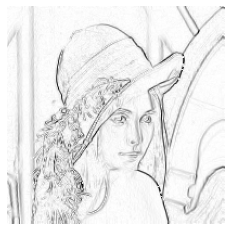

In [3]:
saber  = cv2.imread(image_path)
# 首先将原图像进行边界扩展，并将其转换为灰度图。
gray_saber = cv2.cvtColor(saber,cv2.COLOR_RGB2GRAY)
gray_saber = cv2.resize(gray_saber,(200,200))
 
def RobertsOperator(roi):
    operator_first = np.array([[-1,0],[0,1]])
    operator_second = np.array([[0,-1],[1,0]])
    return np.abs(np.sum(roi[1:,1:]*operator_first))+np.abs(np.sum(roi[1:,1:]*operator_second))
 
def RobertsAlogrithm(image):
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]):
        for j in range(1,image.shape[1]):
            image[i,j] = RobertsOperator(image[i-1:i+2,j-1:j+2])
    return image[1:image.shape[0],1:image.shape[1]]
 
Robert_saber = RobertsAlogrithm(gray_saber)
plt.imshow(Robert_saber,cmap="binary")
plt.axis("off")
plt.show()

## Prewitt算子

Prewitt 是一种图像边缘检测的微分算子，其原理是利用特定区域内像素灰度值产生的差分实现边缘检测。由于 Prewitt 算子采用 3\*3 模板对区域内的像素值进行计算，而Robert算子的模板是 2\*2，故 Prewitt 算子的边缘检测结果在水平方向和垂直方向均比 Robert 算子更加明显，Prewitt算子适合用来识别噪声较多，灰度渐变的图像。

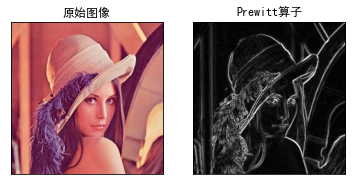

In [4]:
#读取图像
img = cv2.imread(image_path)
lenna_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 
#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
#Prewitt算子
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
#转uint8
absX = cv2.convertScaleAbs(x)      
absY = cv2.convertScaleAbs(y)   
Prewitt = cv2.addWeighted(absX,0.5,absY,0.5,0)
 
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
 
#显示图形
titles = [u'原始图像', u'Prewitt算子'] 
images = [lenna_img, Prewitt] 
for i in range(2): 
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray') 
   plt.title(titles[i]) 
   plt.xticks([]),plt.yticks([]) 
plt.show()

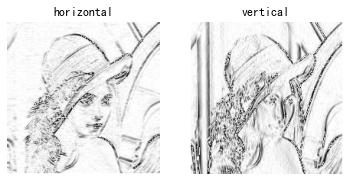

In [5]:
# 不调包实现
saber  = cv2.imread(image_path)
# 首先将原图像进行边界扩展，并将其转换为灰度图。
gray_saber = cv2.cvtColor(saber,cv2.COLOR_RGB2GRAY)
gray_saber = cv2.resize(gray_saber,(200,200))
 
 
def PreWittOperator(roi, operator_type):
    if operator_type == "horizontal":
        prewitt_operator = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    elif operator_type == "vertical":
        prewitt_operator = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    else:
        raise ("type Error")
    result = np.abs(np.sum(roi * prewitt_operator))
    return result
 
 
def PreWittAlogrithm(image, operator_type):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            new_image[i - 1, j - 1] = PreWittOperator(image[i - 1:i + 2, j - 1:j + 2], operator_type)
    new_image = new_image * (255 / np.max(image))
    return new_image.astype(np.uint8)
 
 
plt.subplot(121)
plt.title("horizontal")
plt.imshow(PreWittAlogrithm(gray_saber,"horizontal"),cmap="binary")
plt.axis("off")
plt.subplot(122)
plt.title("vertical")
plt.imshow(PreWittAlogrithm(gray_saber,"vertical"),cmap="binary")
plt.axis("off")
plt.show()

## Sobel算子

Sobel算子是一种用于边缘检测的离散微分算子，它结合了高斯平滑和微分求导。该算子用于计算图像明暗程度近似值。根据图像边缘旁边明暗程度把该区域内超过某个数的特定点记为边缘。Sobel 算子在Prewitt算子的基础上增加了权重的概念，认为相邻点的距离远近对当前像素点的影响是不同的，距离越近的像素点对应当前像素的影响越大，从而实现图像锐化并突出边缘轮廓。Sobel算子的边缘定位更准确，常用于噪声较多，灰度渐变的图像。

Sobel算子依然是一种过滤器，只是其是带有方向的。在OpenCV-Python中，使用Sobel的算子的函数原型如下：

```python
dst = cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])
```

参数解释：

前四个是必须的参数：

- dst 表示输出的边缘图，其大小和通道数与输入图像相同
- src 表示需要处理的图像；
- ddepth 表示图像的深度，-1表示采用的是与原图像相同的深度。目标图像的深度必须大于等于原图像的深度；
- dx和dy表示的是求导的阶数，dx 表示x方向上的差分阶数，取值为1或者0，dy表示y方向上的差分阶数，取值为1或0，0表示这个方向上没有求导，一般为0、1。

其后是可选的参数:
- ksize是Sobel算子的大小，其值必须是正数和奇数，通常为1、3、5、7。
- scale是缩放导数的比例常数，默认情况下没有伸缩系数；
- delta是一个可选的增量，将会加到最终的dst中，同样，默认情况下没有额外的值加到dst中；
- borderType是判断图像边界的模式。这个参数默认值为cv2.BORDER_DEFAULT。

注意：在进行Sobel算子处理之后，还需要调用convertScaleAbs() 函数计算绝对值，并将图像转换为8位图像进行显示。原因是sobel算子求导的话，白到黑是正数，但是黑到白就是负数了，所有的负数都会被截断为0，所以要取绝对值。

```python
dst = convertScaleAbs(src[, dst[, alpha[, beta]]])
 
src表示原数组
 
dst表示输出数组，深度为8位
 
alpha表示比例因子
 
beta表示原数组元素按比例缩放后添加的值
```



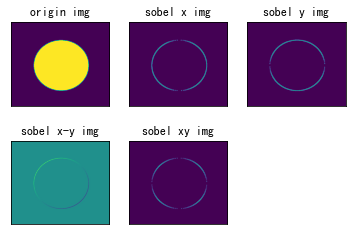

In [6]:
img = cv2.imread('../image/ImageMorphology/circle.jpg', cv2.IMREAD_GRAYSCALE)
# 白到黑是正数，黑到白就是负数，所有的负数都会被截断成0，所以要取绝对值
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobelxAbs = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobelyAbs = cv2.convertScaleAbs(sobely)
# 分别计算x和y，再求和
slbelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
# 不建议直接计算，这里尝试直接计算，看看效果
sobelxy1 = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
sobelxy1 = cv2.convertScaleAbs(sobelxy1)
result = [img, sobelxAbs, sobelyAbs, slbelxy, sobelxy1]
titles = ['origin img', 'sobel x img', 'sobel y img', 'sobel x-y img', 'sobel xy img']
for i in range(5):
    plt.subplot(2, 3, i+1), plt.imshow(result[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

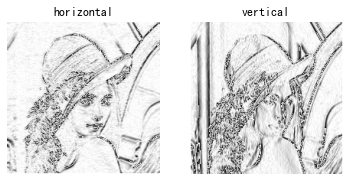

In [7]:
saber  = cv2.imread(image_path)
gray_saber = cv2.cvtColor(saber,cv2.COLOR_RGB2GRAY)
gray_saber = cv2.resize(gray_saber,(200,200))
 
def SobelOperator(roi, operator_type):
    if operator_type == "horizontal":
        sobel_operator = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    elif operator_type == "vertical":
        sobel_operator = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    else:
        raise ("type Error")
    result = np.abs(np.sum(roi * sobel_operator))
    return result
 
 
def SobelAlogrithm(image, operator_type):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            new_image[i - 1, j - 1] = SobelOperator(image[i - 1:i + 2, j - 1:j + 2], operator_type)
    new_image = new_image * (255 / np.max(image))
    return new_image.astype(np.uint8)
 
plt.subplot(121)
plt.title("horizontal")
plt.imshow(SobelAlogrithm(gray_saber,"horizontal"),cmap="binary")
plt.axis("off")
plt.subplot(122)
plt.title("vertical")
plt.imshow(SobelAlogrithm(gray_saber,"vertical"),cmap="binary")
plt.axis("off")
plt.show()

### 总结

Sobel算子是滤波算子的形式来提取边缘，X，Y方向各用一个模板，两个模板组合起来构成一个梯度算子。X方向模板对垂直边缘影响最大，Y方向模板对水平边缘影响最大。

Robert算子是一种梯度算子，它用交叉的差分表示梯度，是一种利用局部差分算子寻找边缘的算子，对具有陡峭的低噪声的图像效果最好。

prewitt算子是加权平均算子，对噪声有抑制作用，但是像素平均相当于对图像进行的同滤波，所以prewitt算子对边缘的定位不如robert算子。

## 二阶微分算子

### Laplacian算子

拉普拉斯（Laplacian）算子是 n 维欧几里得空间中的一个二阶微分算子，常用于图像增强领域和边缘提取，它通过灰度差分计算领域内的像素。

Laplacian算子的基本流程是：判断图像中心像素灰度值与它周围其他像素的灰度值，如果中心像素的灰度更高，则提升中心像素的灰度；反之降低中心像素的灰度，从而实现图像锐化操作。在算法实现过程中，Laplacian算子通过对邻域中心像素的四方向或八方向求梯度，再将梯度相加起来判断中心像素灰度与邻域内其他像素灰度的关系，最后通过梯度运算的结果对像素灰度进行调整。

Laplace算子是一种各向同性算子，二阶微分算子，具有旋转不变性。在只关心边缘的位置而不考虑其周围的象素灰度差值时比较合适。Laplace算子对孤立象素的响应要比对边缘或线的响应要更强烈，因此只适用于无噪声图象。存在噪声情况下，使用Laplacian算子检测边缘之前需要先进行低通滤波。所以，通常的分割算法都是把Laplacian算子和平滑算子结合起来生成一个新的模板。

Python和OpenCV 将Laplacian算子封装在Laplacian()函数中，其函数原型如下所示：
```python
dst = Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])
 
    src表示输入图像
    dst表示输出的边缘图，其大小和通道数与输入图像相同
    ddepth表示目标图像所需的深度
    ksize表示用于计算二阶导数的滤波器的孔径大小，其值必须是正数和奇数，
且默认值为1，更多详细信息查阅getDerivKernels
    scale表示计算拉普拉斯算子值的可选比例因子。默认值为1，更多详细信息查阅getDerivKernels
    delta表示将结果存入目标图像之前，添加到结果中的可选增量值，默认值为0
    borderType表示边框模式，更多详细信息查阅BorderTypes


    注意，Laplacian算子其实主要是利用Sobel算子的运算，通过加上Sobel算子运算出的
图像x方向和y方向上的导数，得到输入图像的图像锐化结果。同时，在进行Laplacian算子
处理之后，还需要调用convertScaleAbs()函数计算绝对值，并将图像转换为8位图进行显示。
```

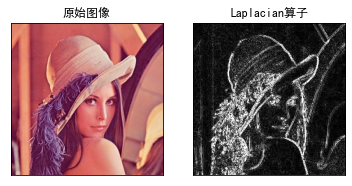

In [8]:
img = cv2.imread(image_path)
lenna_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
 
#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
#拉普拉斯算法
dst = cv2.Laplacian(grayImage, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)
 
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
 
#显示图形
titles = [u'原始图像', u'Laplacian算子'] 
images = [lenna_img, Laplacian] 
for i in range(2): 
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray') 
   plt.title(titles[i]) 
   plt.xticks([]),plt.yticks([]) 
plt.show()

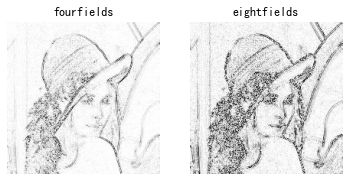

In [9]:
# 不调库实现
saber  = cv2.imread(image_path)
# 首先将原图像进行边界扩展，并将其转换为灰度图。
gray_saber = cv2.cvtColor(saber,cv2.COLOR_RGB2GRAY)
gray_saber = cv2.resize(gray_saber,(200,200))
 
 
def LaplaceOperator(roi, operator_type):
    if operator_type == "fourfields":
        laplace_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    elif operator_type == "eightfields":
        laplace_operator = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
    else:
        raise ("type Error")
    result = np.abs(np.sum(roi * laplace_operator))
    return result
 
 
def LaplaceAlogrithm(image, operator_type):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            new_image[i - 1, j - 1] = LaplaceOperator(image[i - 1:i + 2, j - 1:j + 2], operator_type)
    new_image = new_image * (255 / np.max(image))
    return new_image.astype(np.uint8)
 
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)
        noisy = image + image * gauss
        return noisy
 
plt.subplot(121)
plt.title("fourfields")
plt.imshow(LaplaceAlogrithm(gray_saber,"fourfields"),cmap="binary")
plt.axis("off")
plt.subplot(122)
plt.title("eightfields")
plt.imshow(LaplaceAlogrithm(gray_saber,"eightfields"),cmap="binary")
plt.axis("off")
plt.show()

### LOG算子

LOG算子首先对图像做高斯滤波，然后再求其拉普拉斯（Laplacian）二阶导数，根据二阶导数的锅零点来检测图像的边界，即通过检测滤波结果的零交叉（Zero  crossings）来获得图像或物体的边缘。

LOG算子综合考虑了对噪声的抑制和对边缘的检测两个方向，并且把Gauss平滑滤波器和Laplacian锐化滤波器结合了起来，先平滑掉噪声，再进行边缘检测，所以效果会更好。该算子与视觉生理中的数学模型相似，因此在图像处理领域中得到了广泛的应用。它具有抗干扰能力强，边界定位精度高，边缘连续性好，能有效提取对比度弱的边界等特点。

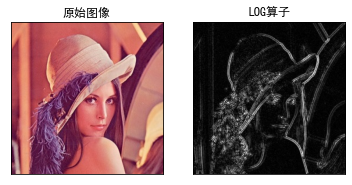

In [10]:
img = cv2.imread(image_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# 先通过高斯滤波降噪
gaussian = cv2.GaussianBlur(img, (3, 3), 0)
 
# 再通过拉普拉斯算子做边缘检测
dst = cv2.Laplacian(gaussian, cv2.CV_16S, ksize=3)
LOG = cv2.convertScaleAbs(dst)
 
# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
 
# 显示图形
titles = [u'原始图像', u'LOG算子']
images = [rgb_img, LOG]
for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

## 非微分边缘检测

### Canny算子

Canny边缘检测是一种比较新的边缘检测算子，具有很好地边缘检测性能，该算子功能比前面几种都要好，但是它实现起来较为麻烦，Canny算子是一个具有滤波，增强，检测的多阶段的优化算子，在进行处理前，Canny算子先利用高斯平滑滤波器来平滑图像以除去噪声，Canny分割算法采用一阶偏导的有限差分来计算梯度幅值和方向，在处理过程中，Canny算子还将经过一个非极大值抑制的过程，最后Canny算子还采用两个阈值来连接边缘（高低阈值输出二值图像）。

边缘检测通常是在保留原有图像属性的情况下，对图像数据规模进行缩减，提取图像边缘轮廓的处理方式。

(1)图象边缘检测必须满足两个条件：一能有效地抑制噪声；二必须尽量精确确定边缘的位置。
 
(2)根据对信噪比与定位乘积进行测度，得到最优化逼近算子。这就是Canny边缘检测算子。
 
(3)类似与Marr（LoG）边缘检测方法，也属于先平滑后求导数的方法。


Canny算子的算法步骤：

- step1: 用高斯滤波器平滑图象；
- step2: 计算图像中每个像素点的梯度强度和方向（用一阶偏导的有限差分来计算梯度的幅值和方向）；
- step3: 对梯度幅值进行非极大值抑制（Non-Maximum Suppression），以消除边缘检测带来的杂散响应；
- step4: 用双阈值算法(Double-Threshold)检测来确定真实和潜在的边缘，通过抑制孤立的弱边缘最终完成边缘检测；

Canny算子Python实现

```python
edges = Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
```

- image：表示输入图像（必须是单通道图像）
- edges：表示输出的边缘图，其大小和类型与输入图像相同
- threshold1：表示第一个滞后性阈值
- threshold2：表示第二个滞后性阈值
- apertureSize：表示应用Sobel算子的孔径大小，其默认值为3
- L2gradient：表示一个计算图像梯度幅值的标识，默认值为FALSE。True：表示使用更精确的L2范数进行计算（即两个方向的倒数的平方和再开方）;False：表示使用L1范数（直接将两个方向导数的绝对值相加）

In [12]:
def edge_demo(image):
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
    # xgrad = cv.Sobel(gray, cv.CV_16SC1, 1, 0) #x方向梯度
    # ygrad = cv.Sobel(gray, cv.CV_16SC1, 0, 1) #y方向梯度
    # edge_output = cv.Canny(xgrad, ygrad, 50, 150)
    edge_output = cv2.Canny(gray, 50, 150)
    cv2.imshow("Canny Edge", edge_output)
    dst = cv2.bitwise_and(image, image, mask=edge_output)
    cv2.imshow("Color Edge", dst)
  
  
# src = cv.imread('logo1.jpg')
# # 设置为WINDOW_NORMAL可以任意缩放
# # cv.namedWindow('input_image', cv.WINDOW_NORMAL)
# cv.imshow('input_image', src)
# edge_demo(src)
# cv.waitKey(0)
# cv.destroyAllWindows()
 
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
 
v1 = cv2.Canny(img, 80, 150)
v2 = cv2.Canny(img, 50, 100)
 
res = np.hstack((v1, img, v2))
cv2.imshow('img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()